In [ ]:
Case Study

Domain – Media

focus – optimize selection process

Business challenge/requirement

Motion Studios is the largest Radio production house in Europe. Their total revenue $ 1B+. Company has launched a 
new reality show – "The Star RJ". The show is about finding a new Radio Jockey who will be the star presenter 
on upcoming shows.

In first round participants have to upload their voice clip online and the clip will be evaluated by experts 
for selection into the next round. There is a separate team in the first round for evaluation of male and female voice.
Response to the show is unprecedented and company is flooded with voice clips.

You as a ML expert have to classify the voice as either male/female so that first level of filtration is quicker.

Key issues

Voice sample are across accents

Considerations
The output from the pre-processed WAV files were saved into the CSV file

Data volume
- Approx 3000 records – file voice-classification.csv

Fields in Data
• meanfreq: mean frequency (in kHz)
• sd: standard deviation of frequency
• median: median frequency (in kHz)
• Q25: first quantile (in kHz)
• Q75: third quantile (in kHz)
• IQR: interquantile range (in kHz)
• skew: skewness (see note in specprop description)
• kurt: kurtosis (see note in specprop description)
• sp.ent: spectral entropy
• sfm: spectral flatness
• mode: mode frequency
• centroid: frequency centroid (see specprop)
• peakf: peak frequency (frequency with highest energy)
• meanfun: average of fundamental frequency measured across acoustic signal
• minfun: minimum fundamental frequency measured across acoustic signal
• maxfun: maximum fundamental frequency measured across acoustic signal
• meandom: average of dominant frequency measured across acoustic signal
• mindom: minimum of dominant frequency measured across acoustic signal
• maxdom: maximum of dominant frequency measured across acoustic signal
• dfrange: range of dominant frequency measured across acoustic signal
• modindx: modulation index. Calculated as the accumulated absolute difference
between adjacent measurements of fundamental frequencies divided by the
frequency range
• label: male or female

    Additional information - NA

Business benefits
Since "The Star RJ" is a reality show, time to select candidates is very short. The whole success of the show 
and hence the profits depends upon quick and smooth execution
 

In [1]:
import pandas as pd
import numpy as np

data='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_9_Supervised_Learning-II/voice-classification.csv'

df=pd.read_csv(data)

df.head(7)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male


In [2]:
df.shape

(3168, 21)

In [3]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [4]:
print(df.dtypes)

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object


In [5]:
# Find missing values
print('Missing values:\n{}'.format(df.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

# Find the unique values of 'diagnosis'.
print('\nUnique values of "diagnosis": {}'.format(df['label'].unique()))

Missing values:
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Number of duplicated records: 2

Unique values of "diagnosis": ['male' 'female']


In [6]:
#There are no missing values or duplicated records. Next the diagnosis distribution is checked.
total = df['label'].count()
male = df[df['label'] == "male"]['label'].count()
print("male: ", male)
print("female: ", total - male)

male:  1584
female:  1584


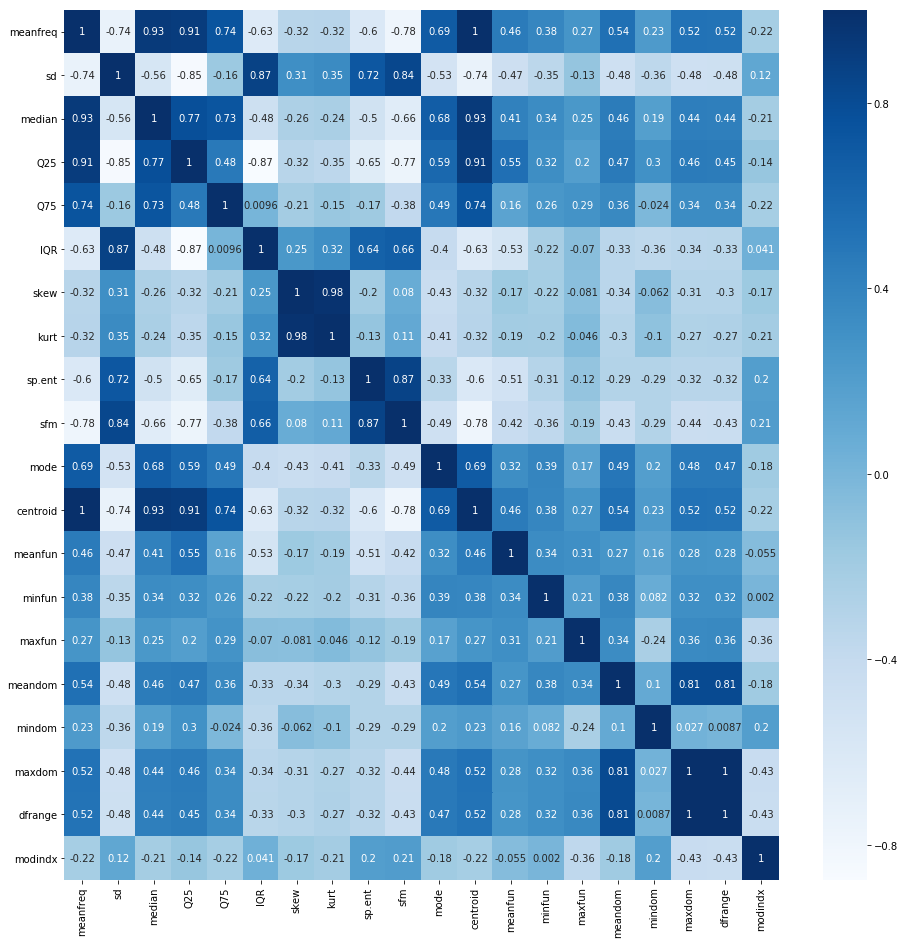

In [8]:
#finding correlation

import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.iloc[:, 0:20].corr()
plt.figure(figsize=(16,16))
sns.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()

In [9]:
#Encode "label" to numerical values

df['label'] = df['label'].map({'male':1,'female':0})

In [ ]:
'''
#Preprocessing: label encoder and normalization
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_
'''

In [21]:
'''
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()
'''

'\nvoice[:]=preprocessing.MinMaxScaler().fit_transform(voice)\nvoice.head()\n'

In [10]:
# Data Wrangling
X = df.iloc[:, 0:20]
Y = df["label"]

X.head(4)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119


In [11]:
#4. Based on correlation remove those predictors that are correlated and fit a logistic regression model 
#again and compare the accuracy with that of previous model.

#meanfreq -->meadian,Q25,centroid
#median --> centroid
#Q25--> centroid
#skew--> kurt
#maxdom-->dfrange


# strong correlated columns So that we can keep
# "meanfreq" -> "median", "Q25", "centroid"
# "Q25" -> "centroid"
# "maxdom" -> "dfrange"


X = X.drop("median",axis=1)
X = X.drop("Q25",axis=1)
X = X.drop("centroid",axis=1)
X = X.drop("dfrange",axis=1)
X = X.drop("kurt",axis=1)




In [12]:
# Split Data

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    X, Y, random_state=10, test_size=0.3)



In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(train_x)
x_test = sc.transform(test_x)

In [14]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

/Users/atul595525/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
#Applying logistic regresion
from sklearn.linear_model import LogisticRegression
ln_model = LogisticRegression()
ln_model.fit(train_x, train_y)

predicted_data = ln_model.predict(test_x)

metrics.accuracy_score(predicted_data, test_y)

0.9085173501577287

In [18]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=0).fit(train_x, train_y)
print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(train_x, train_y)))

predicted_data = tree.predict(test_x)
#print("Accuracy on test set: {:.3f}".format(tree.score(test_x, test_y)))

metrics.accuracy_score(predicted_data, test_y)

Decision Tree
Accuracy on training set: 1.000


0.9716088328075709

In [19]:
#Train random forest model
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(train_x, train_y)
print("Random Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(train_x, train_y)))
print("Accuracy on test set: {:.3f}".format(forest.score(test_x, test_y)))

Random Forests
Accuracy on training set: 0.996
Accuracy on test set: 0.973


In [37]:
#applying NaiveBayes Calssification

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(train_x, train_y)

predicted_data = gnb.predict(test_x)

metrics.accuracy_score(predicted_data, test_y)


#import GaussianNB

0.9221871713985279

In [36]:
'''
#from sklearn import confusion_matrix
#cnf_matrix_gnb = confusion_matrix(test_y,predicted_data)


print(metrics.confusion_matrix(test_y, predicted_data))
# Printing the precision and recall, among other metrics
#print(metrics.classification_report(y_act, y_pred, labels=["a", "b","c"]))

#metrics.accuracy_score(predicted_data, y_test)

'''

'\n#from sklearn import confusion_matrix\n#cnf_matrix_gnb = confusion_matrix(test_y,predicted_data)\n\n\nprint(metrics.confusion_matrix(test_y, predicted_data))\n# Printing the precision and recall, among other metrics\n#print(metrics.classification_report(y_act, y_pred, labels=["a", "b","c"]))\n\n#metrics.accuracy_score(predicted_data, y_test)\n\n'

In [38]:
print("Number of mislabelled points out of total %d points")
(df.shape[0], (test_y !=predicted_data).sum())

Number of mislabelled points out of total %d points


(3168, 74)

In [39]:
(3168-74)/3168

0.9766414141414141

In [40]:
#Applying SVM

from sklearn import svm
from sklearn.metrics import accuracy_score

model = svm.SVC(kernel='linear')
model.fit(train_x, train_y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
y_pred=model.predict(test_x)

In [43]:
metrics.accuracy_score(y_pred, test_y)

0.9390115667718192